In [78]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.gaussian_process.kernels import RBF # It is th squared exponential kernel
from sklearn.metrics import confusion_matrix
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import itertools

In [79]:
import os
os.environ['PATH'].split(os.pathsep)
os.environ['PATH'] += os.pathsep + 'C:/Users/itsna/Graphviz/bin'

In [80]:
bean_data = pd.read_csv("D:/coventry/optimization/Task 1/Dry_Bean_Dataset.csv")
bean_dataS = bean_data.sample(320)
bean_dataS.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
11189,29551,636.078,231.879975,162.659767,1.425552,0.712687,29924,193.972941,0.761467,0.987535,0.917828,0.836523,0.007847,0.002370,0.699771,0.997560,DERMASON
1079,39514,721.708,258.223406,195.142818,1.323253,0.654903,39854,224.300663,0.763334,0.991469,0.953318,0.868630,0.006535,0.002295,0.754519,0.998419,SEKER
11219,29664,639.039,237.782478,159.175017,1.493843,0.742889,29981,194.343453,0.735915,0.989427,0.912819,0.817316,0.008016,0.002206,0.668006,0.997896,DERMASON
6195,51319,886.079,348.043851,188.126825,1.850049,0.841327,51923,255.619601,0.822736,0.988367,0.821378,0.734447,0.006782,0.001217,0.539412,0.997938,HOROZ
8650,44164,791.839,300.444065,187.943128,1.598590,0.780183,44698,237.131506,0.694141,0.988053,0.885125,0.789270,0.006803,0.001628,0.622947,0.995837,SIRA


In [81]:
feature_cols = ['Area', 'Perimeter',  'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4'  ]
class_names = ['Class']

In [82]:
x = bean_dataS[feature_col]
y = bean_dataS[class_name].values
x

,Area,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
11189,29551,636.078,231.879975,162.659767,0.712687,29924,193.972941,0.761467,0.987535,0.917828,0.836523,0.007847,0.002370,0.699771,0.997560
1079,39514,721.708,258.223406,195.142818,0.654903,39854,224.300663,0.763334,0.991469,0.953318,0.868630,0.006535,0.002295,0.754519,0.998419
11219,29664,639.039,237.782478,159.175017,0.742889,29981,194.343453,0.735915,0.989427,0.912819,0.817316,0.008016,0.002206,0.668006,0.997896
6195,51319,886.079,348.043851,188.126825,0.841327,51923,255.619601,0.822736,0.988367,0.821378,0.734447,0.006782,0.001217,0.539412,0.997938
8650,44164,791.839,300.444065,187.943128,0.780183,44698,237.131506,0.694141,0.988053,0.885125,0.789270,0.006803,0.001628,0.622947,0.995837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7602,37975,716.986,268.717634,180.185717,0.741874,38299,219.889226,0.730738,0.991540,0.928296,0.818291,0.007076,0.001957,0.669600,0.998600
13483,40552,741.016,276.357602,187.451284,0.734792,40892,227.227661,0.819299,0.991685,0.928041,0.822223,0.006815,0.001921,0.676051,0.996696
5301,86375,1126.579,434.384645,255.217649,0.809196,87679,331.626395,0.782850,0.985128,0.855214,0.763439,0.005029,0.001054,0.582840,0.992003
7812,39992,741.018,278.557555,183.494634,0.752378,40423,225.653265,0.760189,0.989338,0.915220,0.810078,0.006965,0.001850,0.656226,0.996196


In [83]:
y

array([['DERMASON'],
       ['SEKER'],
       ['DERMASON'],
       ['HOROZ'],
       ['SIRA'],
       ['SIRA'],
       ['DERMASON'],
       ['SIRA'],
       ['DERMASON'],
       ['BARBUNYA'],
       ['DERMASON'],
       ['BOMBAY'],
       ['SEKER'],
       ['BARBUNYA'],
       ['SEKER'],
       ['SIRA'],
       ['DERMASON'],
       ['DERMASON'],
       ['HOROZ'],
       ['CALI'],
       ['DERMASON'],
       ['SEKER'],
       ['SIRA'],
       ['HOROZ'],
       ['HOROZ'],
       ['SIRA'],
       ['BOMBAY'],
       ['BOMBAY'],
       ['BOMBAY'],
       ['HOROZ'],
       ['SIRA'],
       ['CALI'],
       ['SEKER'],
       ['SEKER'],
       ['SIRA'],
       ['BOMBAY'],
       ['BOMBAY'],
       ['BOMBAY'],
       ['DERMASON'],
       ['BARBUNYA'],
       ['SIRA'],
       ['CALI'],
       ['HOROZ'],
       ['DERMASON'],
       ['DERMASON'],
       ['BARBUNYA'],
       ['DERMASON'],
       ['DERMASON'],
       ['SIRA'],
       ['BARBUNYA'],
       ['CALI'],
       ['SEKER'],
       ['HOROZ'],

In [84]:
#Traing and testing sampling
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=44)

In [85]:

#Gaussian Process Classification
kernel_gp = 1.0 * RBF([1.0])# RBF is the squared exponential kernel
gpc = GaussianProcessClassifier(kernel=kernel_gp, random_state=44).fit(X_train,y_train)
gpc.score(X_train,y_train)

#Predict the response for test dataset
y_pred_GP = gpc.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("GP Accuracy:",metrics.accuracy_score(y_test, y_pred_GP)*100)

      
print("GP  Report :",classification_report(y_test, y_pred_GP))

C:\Users\itsna\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GP Accuracy: 15.625
GP  Report :               precision    recall  f1-score   support

    BARBUNYA       0.00      0.00      0.00         6
      BOMBAY       0.00      0.00      0.00         4
        CALI       0.00      0.00      0.00         5
    DERMASON       0.00      0.00      0.00        19
       HOROZ       0.00      0.00      0.00         9
       SEKER       0.00      0.00      0.00        11
        SIRA       0.16      1.00      0.27        10

    accuracy                           0.16        64
   macro avg       0.02      0.14      0.04        64
weighted avg       0.02      0.16      0.04        64



C:\Users\itsna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


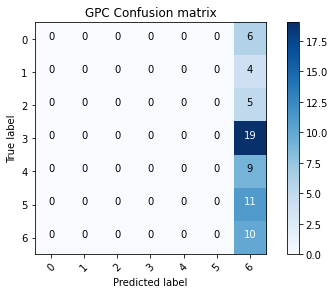

In [86]:

# Function to plot confusion matrix    
def plot_confusion_matrix_gp(cm, classes,
                          normalize=False,
                          title='GPC Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')    

# compute the confusion matrix
confusion_mtx_gp = confusion_matrix(y_test, y_pred_GP)

# plot the confusion matrix
plot_confusion_matrix_gp(confusion_mtx_gp, classes = range(7)) 


In [87]:
# Create Decision Tree classifer object
clf_dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_dt = clf_dt.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dt = clf_dt.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("DT Accuracy:",metrics.accuracy_score(y_test, y_pred_dt)*100)

      
print("Decision Tree Report : ",
    classification_report(y_test, y_pred_dt))

DT Accuracy: 85.9375
Decision Tree Report :                precision    recall  f1-score   support

    BARBUNYA       0.86      1.00      0.92         6
      BOMBAY       1.00      1.00      1.00         4
        CALI       1.00      1.00      1.00         5
    DERMASON       0.93      0.74      0.82        19
       HOROZ       0.82      1.00      0.90         9
       SEKER       0.82      0.82      0.82        11
        SIRA       0.73      0.80      0.76        10

    accuracy                           0.86        64
   macro avg       0.88      0.91      0.89        64
weighted avg       0.87      0.86      0.86        64



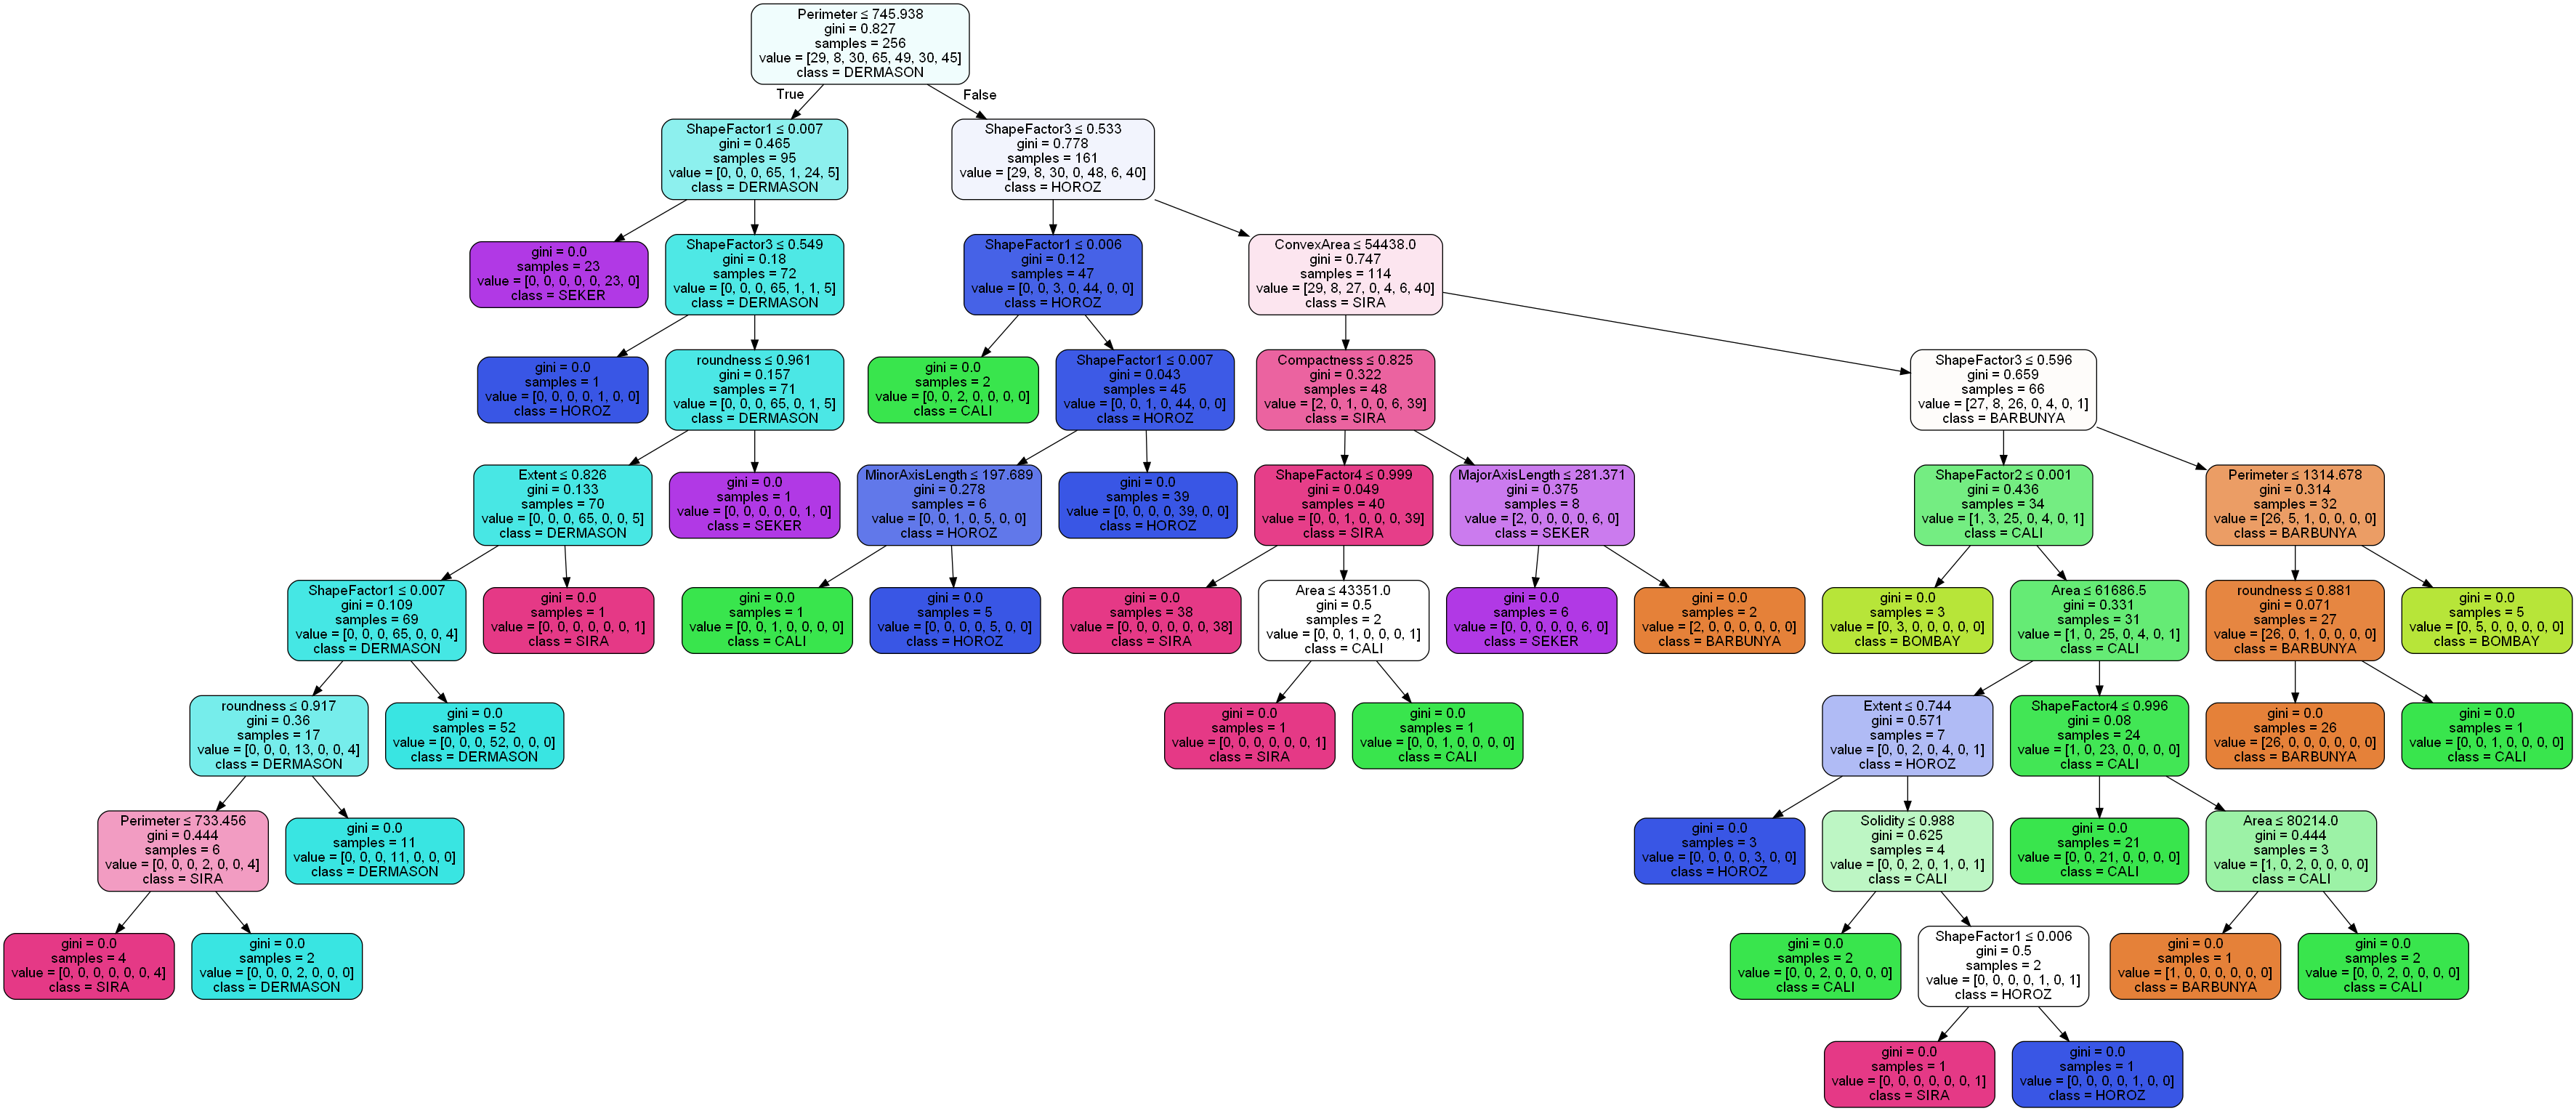

In [88]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_col,class_names=['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dt_beans.png')
Image(graph.create_png())

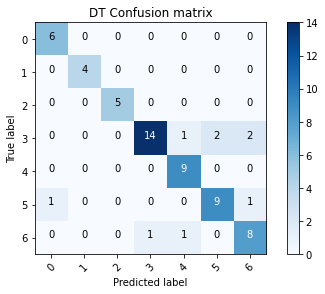

In [89]:
# Function to plot confusion matrix    
def plot_confusion_matrix_dt(cm, classes,
                          normalize=False,
                          title='DT Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')    
# compute the confusion matrix
confusion_mtx_dt = confusion_matrix(y_test, y_pred_dt)


# plot the confusion matrix
plot_confusion_matrix_dt(confusion_mtx_dt, classes = range(7))

In [92]:
from sklearn import svm

#Create a svm Classifier
clf_svm = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf_svm.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm = clf_svm.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("SVM Accuracy:",metrics.accuracy_score(y_test, y_pred_svm)*100)

      
print("SVM Report : ",
    classification_report(y_test, y_pred_svm))

C:\Users\itsna\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVM Accuracy: 95.3125
SVM Report :                precision    recall  f1-score   support

    BARBUNYA       1.00      1.00      1.00         6
      BOMBAY       1.00      1.00      1.00         4
        CALI       1.00      1.00      1.00         5
    DERMASON       0.94      0.89      0.92        19
       HOROZ       1.00      0.89      0.94         9
       SEKER       1.00      1.00      1.00        11
        SIRA       0.83      1.00      0.91        10

    accuracy                           0.95        64
   macro avg       0.97      0.97      0.97        64
weighted avg       0.96      0.95      0.95        64



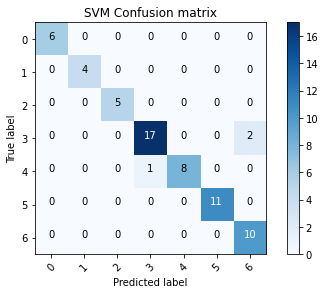

In [91]:
 # Function to plot confusion matrix    
def plot_confusion_matrix_svm(cm, classes,
                          normalize=False,
                          title='SVM Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')    

# compute the svm confusion matrix
confusion_mtx_svm = confusion_matrix(y_test, y_pred_svm)

# plot the confusion matrix
plot_confusion_matrix_svm(confusion_mtx_svm, classes = range(7)) 

